In [3]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

# Code only works with YAXArrays 0.4.6
# Pkg.add(PackageSpec(name ="YAXArrays", version="0.4.6"))
# using YAXArrays
# using Zarr

  Activating project at `~/git/spatio_temporal_data-rainforest_development`


┌ Warning: The project dependencies or compat requirements have changed since the manifest was last resolved.
│ It is recommended to `Pkg.resolve()` or consider `Pkg.update()` if necessary.
└ @ Pkg.API /home/olaf/.julia/juliaup/julia-1.9.2+0.x64.linux.gnu/share/julia/stdlib/v1.9/Pkg/src/API.jl:1687


In [4]:

import JSON

include("src/rainforest_lib.jl")
using .Rainforestlib

using Dates

lcc_path = JSON.parsefile("src/datacube_paths.json")["coarse"]
lcc = Rainforestlib.get_lc_datacube(lcc_path)

filtered_dc = Rainforestlib.spatio_temporal_filter(lcc; lon_bounds=(-82, -34), lat_bounds= (-56.5,13), time_bounds = (Date(2010), Date(2021)))

#=======================#

include("src/LCCSClasses.jl")
using .LCCSClasses

# set a set of accepted values
rainforest_values = Set(LCCSClasses.categories["rainforest"].lccs_classes)

forest_values = Set(LCCSClasses.categories["forest"].lccs_classes)

all_forest_values = union(forest_values, rainforest_values)


Set{String} with 13 elements:
  "tree_needleleaved_evergreen_open"
  "tree_needleleaved_deciduous_closed"
  "tree_needleleaved_deciduous_open"
  "tree_needleleaved_deciduous_closed_to_open"
  "tree_broadleaved_deciduous_open"
  "tree_broadleaved_deciduous_closed"
  "tree_broadleaved_evergreen_closed_to_open"
  "tree_cover_flooded_saline_water"
  "tree_needleleaved_evergreen_closed"
  "tree_mixed"
  "tree_broadleaved_deciduous_closed_to_open"
  "tree_cover_flooded_fresh_or_brakish_water"
  "tree_needleleaved_evergreen_closed_to_open"

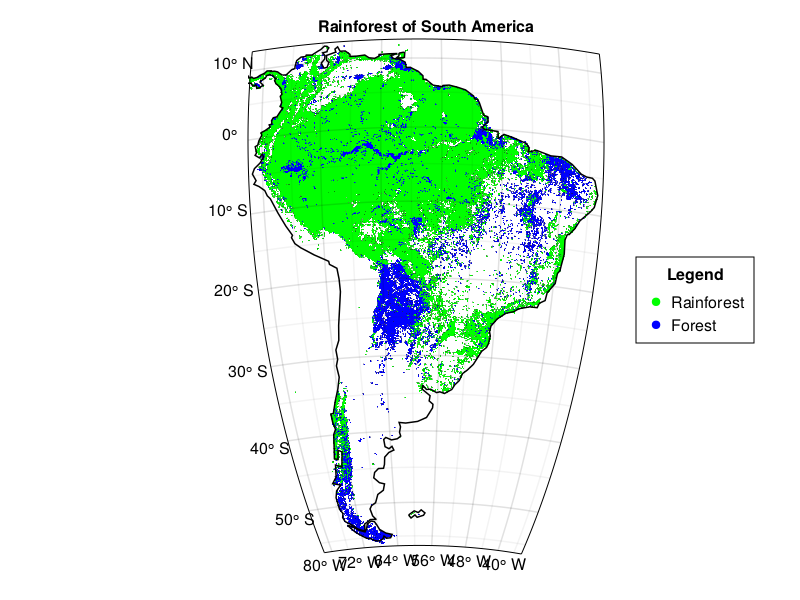

In [25]:
include("src/rainforest_lib.jl")
using .Rainforestlib
include("src/LCCSClasses.jl")
using .LCCSClasses

searched_classes = filter(p -> first(p) == "rainforest" || first(p) == "forest", Rainforestlib.LCCSClasses.categories)
searched_classes = sort(searched_classes, by = x -> x[2])


using Colors, ColorSchemes

# custom_colormap = [RGB(1/length(searched_classes)*i, 1/length(searched_classes)*(length(searched_classes)-i), 1/length(searched_classes)*(length(searched_classes)-i)) for i in 1:length(searched_classes)]
custom_colormap = [
    RGB(0.0, 1.0, 0.0),  # Green
    RGB(0.0, 0.0, 1.0),  # Blue
    #RGB(1.0, 0.0, 0.0)   # Red
]
# display(custom_colormap)

local_figure = Rainforestlib.build_figure_by_categories(filtered_dc, searched_classes; colormap = custom_colormap, legend=true, title="Rainforest of South America")


In [30]:
include("src/rainforest_lib.jl")
using .Rainforestlib
using Colors, ColorSchemes

custom_colormap = [
    RGB(1.0, 1.0, 1.0),  # Red
    RGB(0.0, 0.0, 1.0),  # Blue
    RGB(0.0, 1.0, 0.0)   # Green
]

#build a map of the rainforest in south america
local_figure = Rainforestlib.build_figure_by_lcc_classes(
    filtered_dc, 
    all_forest_values; 
    set_nan = true,
    legend=true
)

MethodError: MethodError: no method matching build_figure_by_lcc_classes(::YAXArrays.Cubes.YAXArray{UInt8, 3, DiskArrays.SubDiskArray{UInt8, 3}, Vector{YAXArrays.Cubes.Axes.CubeAxis}}, ::Set{String}; set_nan::Bool, legend::Bool)

Closest candidates are:
  build_figure_by_lcc_classes(::Any, ::Set{String}; local_map, timestep, lonpadding, latpadding, colormap, colorrange, shading, set_nan, resolution) got unsupported keyword argument "legend"
   @ Main.Rainforestlib ~/git/spatio_temporal_data-rainforest_development/src/rainforest_lib.jl:249
